4575
4575
62


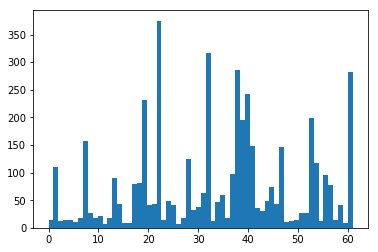

shape = (240, 249, 3), min = 3, max = 255
shape = (123, 123, 3), min = 5, max = 255
shape = (91, 92, 3), min = 2, max = 255
shape = (100, 68, 3), min = 17, max = 255


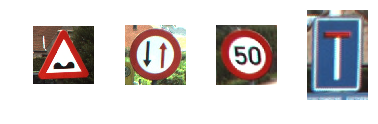

In [1]:
%matplotlib inline
import os
from skimage.data import imread
import matplotlib.pyplot as plt

"""
1. Download BelgiumTSC_Training.zip, BelgiumTSC_Testing.zip as training and testing data respectively 
   from http://btsd.ethz.ch/shareddata/
2. Unzip these files, massage training data to load them as numpy arrays.
3. Inspect feature and label distributions
"""

HOME_PATH = '/Users/ajaspal/tensorflow-starterkit/'
training_data_directory = os.path.join(HOME_PATH, 'BelgiumTSC_Training/Training')
testing_data_directory = os.path.join(HOME_PATH,'BelgiumTSC_Testing/Testing')

def load_data(dir_name):
    directories = [d for d in os.listdir(dir_name) if os.path.isdir(os.path.join(dir_name, d))]
    labels = []
    images = []
    for d in directories:
        dir_path = os.path.join(dir_name, d)
        files = [os.path.join(dir_path, file_name) for file_name in os.listdir(dir_path) if file_name.endswith(".ppm")]
        for file_name in files:
            images.append(imread(file_name))
            labels.append(int(d))
    return (images, labels)

    
features, labels = load_data(training_data_directory)
print len(features)
print len(labels)
print len(set(labels))
plt.hist(labels,62)
plt.show()

random_image_ids = [10, 999, 2111, 4000]

for i in range(len(random_image_ids)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(features[random_image_ids[i]])
    plt.subplots_adjust(wspace = 0.5)
    print "shape = %s, min = %s, max = %s"  %(features[random_image_ids[i]].shape,
                                              features[random_image_ids[i]].min(),
                                              features[random_image_ids[i]].max())
plt.show()

/anaconda/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


shape = (28, 28), min = 0.0633482938175, max = 1.0
shape = (28, 28), min = 0.133166881127, max = 0.999825551471
shape = (28, 28), min = 0.10783162465, max = 1.0
shape = (28, 28), min = 0.106559607843, max = 0.997147571028


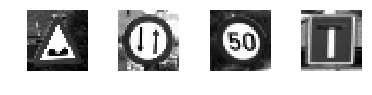

In [4]:
"""
After doing data inspection we found the following -

1. Labels are distributed unevenly.
2. Size of the images in not the same across labels.

Since the images are of different size and colors we will resize them 
and convert them into grayscale before feeding them into our model.
"""

from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np

images28 = [resize(image, (28, 28)) for image in features]
images28_gray = rgb2gray(np.array(images28))

random_image_ids = [10, 999, 2111, 4000]

for i in range(len(random_image_ids)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28_gray[random_image_ids[i]], cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    print "shape = %s, min = %s, max = %s"  %(images28_gray[random_image_ids[i]].shape,
                                              images28_gray[random_image_ids[i]].min(),
                                              images28_gray[random_image_ids[i]].max())
plt.show()


In [59]:
"""
After normalizing our images wrt size and colors we will feed them to a single layer neural network
created using tensor flow apis.
"""

import tensorflow as tf

x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)


tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(500):
        #print('EPOCH', i)
        _, loss_v = sess.run([train_op, loss], feed_dict={x: images28_gray, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss_v)
        #print('DONE WITH EPOCH')

('images_flat: ', <tf.Tensor 'Flatten_6/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected_6/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean_12:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax_6:0' shape=(?,) dtype=int64>)
('Loss: ', 4.2060852)
('Loss: ', 3.57428)
('Loss: ', 3.2631705)
('Loss: ', 2.9994721)
('Loss: ', 2.7888005)
('Loss: ', 2.6172903)
('Loss: ', 2.4790783)
('Loss: ', 2.3666537)
('Loss: ', 2.2737873)
('Loss: ', 2.1954148)
('Loss: ', 2.1279857)
('Loss: ', 2.0692065)
('Loss: ', 2.0173416)
('Loss: ', 1.9710714)
('Loss: ', 1.9294077)
('Loss: ', 1.8915781)
('Loss: ', 1.8569894)
('Loss: ', 1.8251245)
('Loss: ', 1.7956762)
('Loss: ', 1.7683921)
('Loss: ', 1.7430022)
('Loss: ', 1.7192976)
('Loss: ', 1.6970948)
('Loss: ', 1.6762239)
('Loss: ', 1.6565591)
('Loss: ', 1.6379893)
('Loss: ', 1.6204206)
('Loss: ', 1.6037637)
('Loss: ', 1.5879414)
('Loss: ', 1.5728885)
('Loss: ', 1.5585439)
('Loss: ', 1.5448545)
('Lo

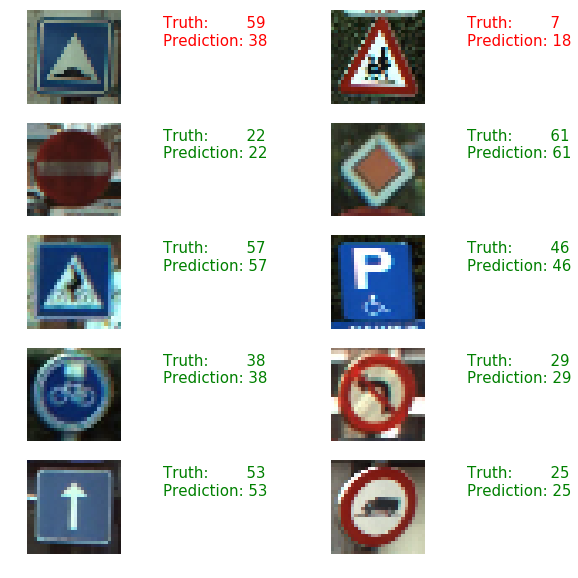

In [60]:
from random import sample
idx = sample(range(len(images28_gray)),10)
images_test = [images28_gray[i] for i in idx]
label_test = [labels[i] for i in idx]
prediction = sess.run([correct_pred], feed_dict = {x : images_test, y : label_test})
#print prediction
#print label_test
fig = plt.figure(figsize=(10, 10))
for i in range(len(images_test)):
    plt.subplot(5, 2, i+1)
    plt.axis('off')
    if labels[idx[i]] == prediction[0][i]: 
        color = 'green'
    else :
        color = 'red'
    #print i
    #pred = prediction[0][i]
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(labels[idx[i]], prediction[0][i]), 
             fontsize=15, color=color)
    plt.imshow(images28[idx[i]])
    #plt.subplots_adjust(wspace = 0.5)
    
plt.show()